# Problem Statement

World Health Organization(WHO) conducted a world-wide survey and collected data from various regions of the world to determine life expectancy of the people of those regions. They collected this data through local sources and with the help of several local and internation NGOs that were operating in those areas.

The data we have is a sample of the original data collected by WHO. Your job is to follow the Data Science pipeline and build a Machine Learning model that will predict the average life expectancy of the people of an area based on given features. The pipeline is as follows:

1. Data Wrangling and Preprocessing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Training
5. Testing and Optimization

***While solving this problem, build an intuition about which features are useful using a thorough analysis and build a regression model with minimum loss/error. The evaluation metric that will be used is Mean Absolute Error. Also make sure that you model is neither underfitting nor overfitting.***  

In [3]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train (1).csv to train (1).csv


In [5]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Description

The first thing you need to do before solving any Data Science problem is getting familiar with the dataset. Get to know your data by printing out some stats, checking its dimensions and checking data types of features.

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

In [6]:
# Loading training data from google drive
train_data = pd.read_csv('/content/train (1).csv')

In [13]:
# Dimensions of training data
# Dropping the first column which is serial numbers
train_data = train_data.drop(train_data.columns[0], axis=1)
num_rows = train_data.shape[0]
num_cols = train_data.shape[1]
print("Dimensions of training data :", (num_rows, num_cols))


Dimensions of training data : (362, 16)


In [14]:
# Columns in the dataset
print(train_data.columns.tolist())

['surface_area', 'agricultural_land', 'forest_area', 'armed_forces_total', 'urban_pop_major_cities', 'urban_pop_minor_cities', 'national_income', 'inflation_annual', 'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions', 'internet_users', 'secure_internet_servers_total', 'improved_sanitation', 'women_parliament_seats_rate', 'life_expectancy']


In [15]:
from IPython.display import HTML
description_transposed = train_data.describe().T
html_description = description_transposed.to_html()
display(HTML(html_description))


,count,mean,std,min,25%,50%,75%,max
surface_area,362.0,4.021884e+06,1.234491e+07,30.300000,2.783000e+04,2.037745e+05,1.081610e+06,1.343253e+08
agricultural_land,358.0,1.594881e+08,4.964143e+08,300.000000,1.054198e+06,5.360256e+06,4.221935e+07,5.067600e+09
forest_area,357.0,1.204151e+08,3.796623e+08,0.000000,4.951445e+05,3.928535e+06,2.241297e+07,4.132117e+09
armed_forces_total,318.0,9.849864e+05,2.994686e+06,50.000000,1.218000e+04,5.352500e+04,2.598000e+05,2.720662e+07
urban_pop_major_cities,360.0,2.765946e+01,2.051288e+01,0.091444,1.062462e+01,2.445944e+01,3.858718e+01,9.240907e+01
urban_pop_minor_cities,360.0,2.917524e+01,2.120649e+01,0.074575,1.101374e+01,2.673513e+01,4.349942e+01,8.914290e+01
inflation_annual,146.0,1.681539e+00,9.803077e-01,-2.372263,1.202953e+00,1.762683e+00,2.485675e+00,2.997694e+00
inflation_monthly,156.0,4.759692e-01,1.534300e-01,0.250543,3.477989e-01,4.597899e-01,5.773399e-01,8.101523e-01
inflation_weekly,20.0,3.964783e-01,2.035834e-01,0.209993,2.321181e-01,2.979383e-01,5.375414e-01,7.815275e-01
secure_internet_servers_total,352.0,2.949654e+08,7.234006e+08,40025.000000,3.468446e+06,2.671228e+07,2.173937e+08,8.207343e+09


In [16]:
# Checking Datatypes
columns_with_dtype = train_data.dtypes.reset_index()
columns_with_dtype.columns = ['Column Name', 'Data Type']
print(columns_with_dtype)

                      Column Name Data Type
0                    surface_area   float64
1               agricultural_land   float64
2                     forest_area   float64
3              armed_forces_total   float64
4          urban_pop_major_cities   float64
5          urban_pop_minor_cities   float64
6                 national_income    object
7                inflation_annual   float64
8               inflation_monthly   float64
9                inflation_weekly   float64
10           mobile_subscriptions    object
11                 internet_users    object
12  secure_internet_servers_total   float64
13            improved_sanitation    object
14    women_parliament_seats_rate    object
15                life_expectancy   float64


In [17]:
# Head of the dataset
from IPython.display import display, HTML

head_transposed = train_data.head().T
head_transposed.index.name = 'Column Name'
html_table = head_transposed.to_html()
display(HTML(html_table))

,0,1,2,3,4
Column Name,,,,,
surface_area,120540.0,752610.0,1396.0,2758812.0,340.0
agricultural_land,2632839.465438,24030389.105693,3000.0,122884535.217072,11000.000001
forest_area,5417843.036231,49575535.051996,80.0,105094302.736211,16990.000002
armed_forces_total,1379000.0,16500.0,NaN,1518650.0,NaN
urban_pop_major_cities,55.747169,16.890687,18.39009,50.966885,5.311885
urban_pop_minor_cities,4.688831,23.136313,23.13991,24.522427,30.271115
national_income,unknown,very low,unknown,high,unknown
inflation_annual,NaN,NaN,NaN,1.374906,-0.044229
inflation_monthly,NaN,0.581473,NaN,NaN,NaN


In [18]:
# Tail of the dataset
tail_transposed = train_data.tail().T
tail_transposed.index.name = 'Column Name'
html_table_tail = tail_transposed.to_html()
display(HTML(html_table_tail))

,357,358,359,360,361
Column Name,,,,,
surface_area,243610.0,9831510.0,176220.0,330972.0,350.0
agricultural_land,17369988.105125,435757614.688246,14461477.888631,11606702.474289,4000.000001
forest_area,3131596.330561,332694329.419413,1811858.156321,15493464.636605,17819.999999
armed_forces_total,159150.0,1433150.0,25450.0,522000.0,NaN
urban_pop_major_cities,42.818424,22.948363,92.409069,27.411815,32.291719
urban_pop_minor_cities,39.273576,58.328637,2.573931,4.897185,62.772281
national_income,high,very high,medium high,low,unknown
inflation_annual,2.554547,1.464833,NaN,NaN,NaN
inflation_monthly,NaN,NaN,0.714595,0.549355,NaN


## Data Wrangling and Preprocessing

This is perhaps the most time consuming and challenging part of any Data Science or Machine Learning problem. You have to preprocess your data in order to make it useful for data analysis and model training. Although, the steps involved vary depending on the problem and the dataset but here we have provided a roughly generic approach which is applicable for most problems. The steps involved are as follows:

1. Look for Null or Missing Values
2. Change data type of features, if required
3. Encode data of categorical features
4. Deal with Null or Missing values

In [19]:
#Checking missing values
any_null_values = train_data.isnull().any().any()
print("Are there any null values in the dataset?", any_null_values)


Are there any null values in the dataset? True


In [20]:
# Missing values in each column of training data
missing_values_per_column = train_data.isnull().sum()
print("Missing values in each column of the training data (excluding the first column):")
print(missing_values_per_column)

Missing values in each column of the training data (excluding the first column):
Column Name
surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64


In [21]:
# Data type of the 'mobile_subscriptions' column
print(train_data['mobile_subscriptions'].dtype)

col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list


object


['national_income',
 'mobile_subscriptions',
 'internet_users',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [22]:
#Unique values in 'women_parliament_seats_rate'
unique_values = train_data['women_parliament_seats_rate'].unique()
print("Unique values in 'women_parliament_seats_rate' column:")
print(unique_values)

Unique values in 'women_parliament_seats_rate' column:
['[0%-25%)' 'unknown' '[25%-50%)' '[50%-75%)']


In [23]:
# Copy of the original data
data_copy = train_data.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder object to handle categorical data using label encoding
label_encoder = LabelEncoder()
data_copy['national_income'] = label_encoder.fit_transform(data_copy['national_income'])
data_copy['internet_users'] = label_encoder.fit_transform(data_copy['internet_users'])
data_copy['mobile_subscriptions'] = label_encoder.fit_transform(data_copy['mobile_subscriptions'])
data_copy['improved_sanitation'] = label_encoder.fit_transform(data_copy['improved_sanitation'])
data_copy['women_parliament_seats_rate'] = label_encoder.fit_transform(data_copy['women_parliament_seats_rate'])


In [25]:
# Comparing Actual and Encoded labels
print("Column: national_income")
print(train_data['national_income'].unique())
print(data_copy['national_income'].unique())
print("Column: mobile_subscriptions")
print(train_data['mobile_subscriptions'].unique())
print(data_copy['mobile_subscriptions'].unique())
print("Column: improved_sanitation")
print(train_data['improved_sanitation'].unique())
print(data_copy['improved_sanitation'].unique())
print("Column: women_parliament_seats_rate")
print(train_data['women_parliament_seats_rate'].unique())
print(data_copy['women_parliament_seats_rate'].unique())

Column: national_income
['unknown' 'very low' 'high' 'medium low' 'medium high' 'low' 'very high']
[4 6 0 3 2 1 5]
Column: mobile_subscriptions
['less than 1 per person' 'more than 1 per person'
 'more than 2 per person' 'unknown' 'more than 3 per person']
[0 1 2 4 3]
Column: improved_sanitation
['high access' 'low access' 'no info' 'very high access' 'medium access'
 'very low access']
[0 1 3 4 2 5]
Column: women_parliament_seats_rate
['[0%-25%)' 'unknown' '[25%-50%)' '[50%-75%)']
[0 3 1 2]


In [26]:
# Convert unknown in internet_uses to -1
data_copy['internet_users'] = data_copy['internet_users'].replace('unknown', -1)

In [27]:
missing_values_per_column = data_copy.isnull().sum()
print("Missing values in each column of the training data :")
print(missing_values_per_column)

Missing values in each column of the training data :
Column Name
surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64


In [28]:
from sklearn.impute import SimpleImputer

#Columns with missing values
columns_with_missing_values = ['agricultural_land', 'forest_area', 'armed_forces_total',
                                'urban_pop_minor_cities', 'urban_pop_major_cities',
                                'inflation_annual', 'inflation_monthly', 'inflation_weekly',
                                'secure_internet_servers_total']
imputer = SimpleImputer(strategy='mean')
data_copy[columns_with_missing_values] = imputer.fit_transform(data_copy[columns_with_missing_values])


In [29]:
#Attributes after filling in data points
missing_values_per_column = data_copy.isnull().sum()
print("Missing values in each column of the training data :")
print(missing_values_per_column)

Missing values in each column of the training data :
Column Name
surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
inflation_monthly                0
inflation_weekly                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64


## Data Analysis and Visualizations

Performing a detailed analysis of the data helps you understand which features are important, what's their correlation with each other which features would contribute in predicting the target variable. Different types of visualizations and plots can help you acheive that. These include:

1. Bar Plots
2. Joint Plots
3. Box Plots
4. Correlation Heatmap
5. Distribution Plot
6. PCA Bi-plot

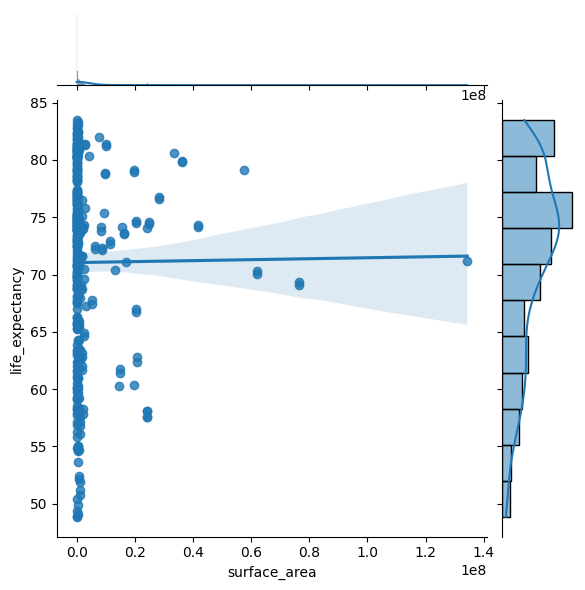

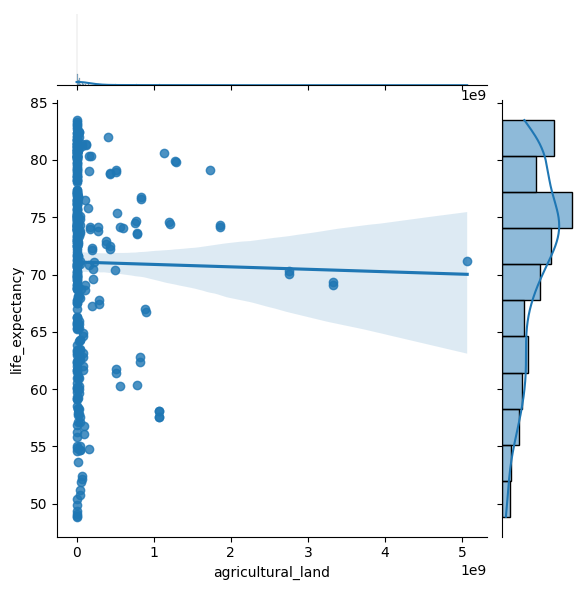

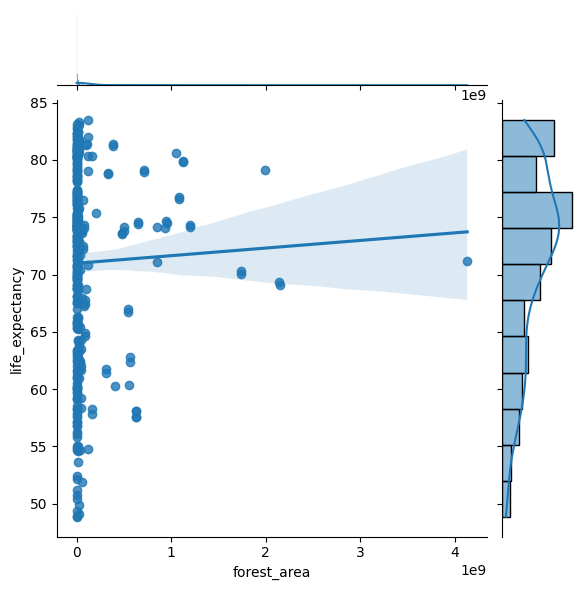

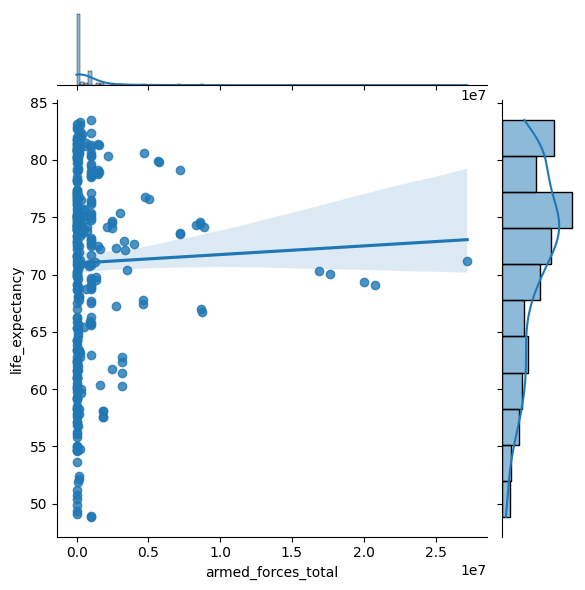

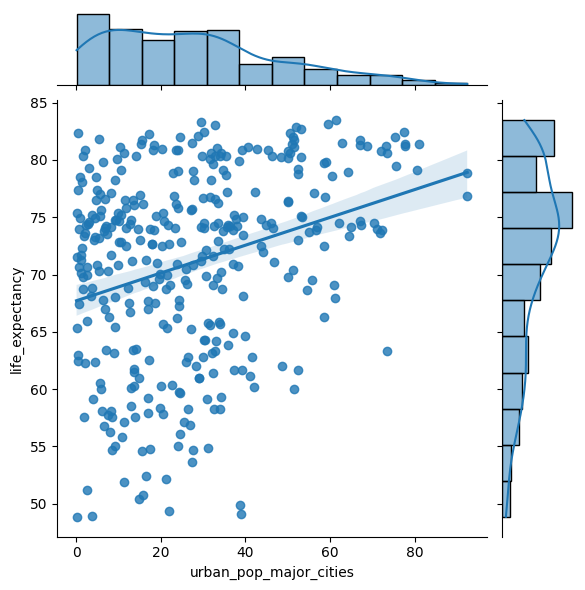

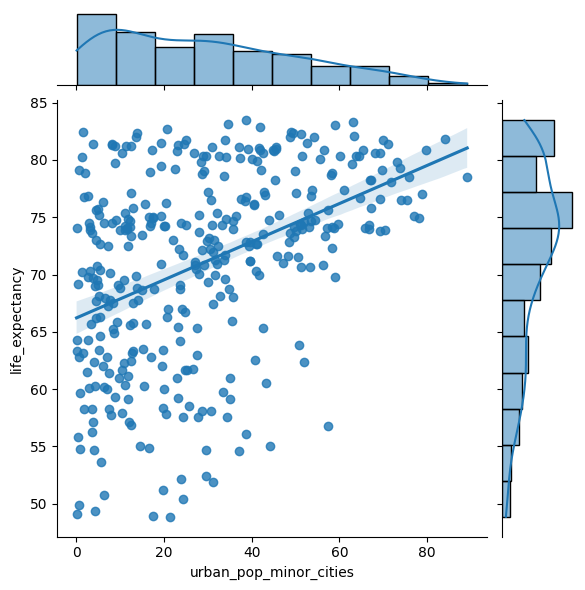

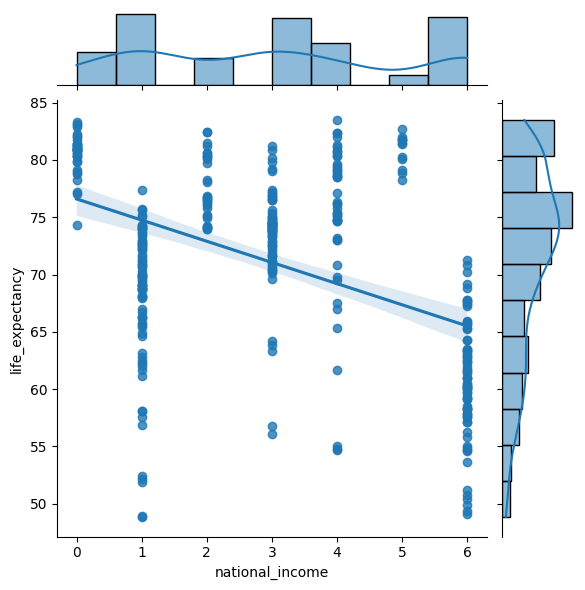

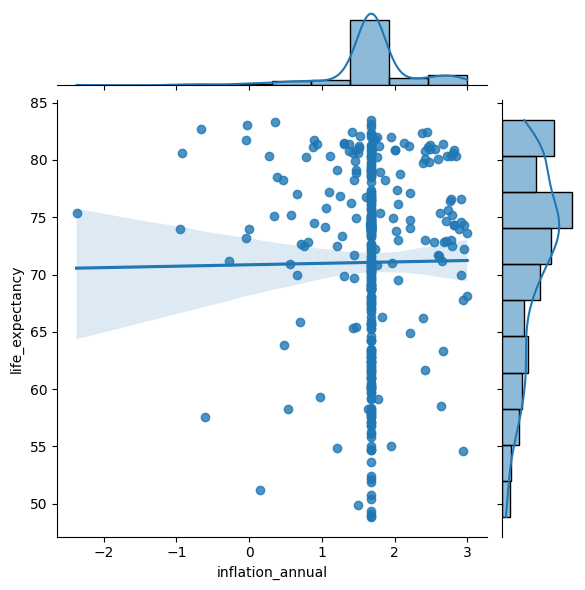

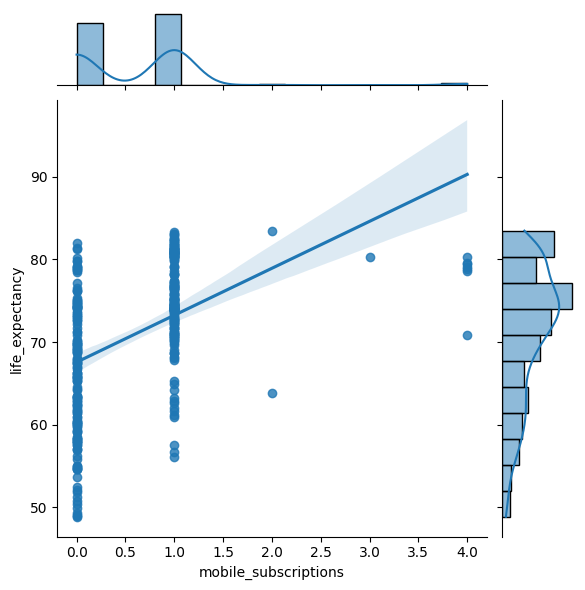

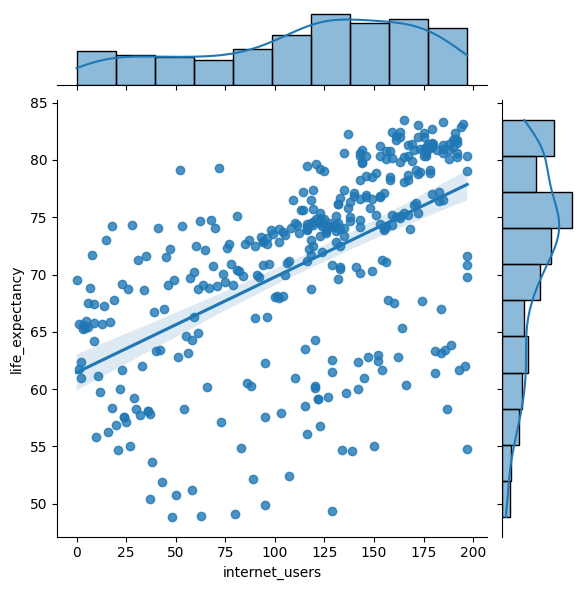

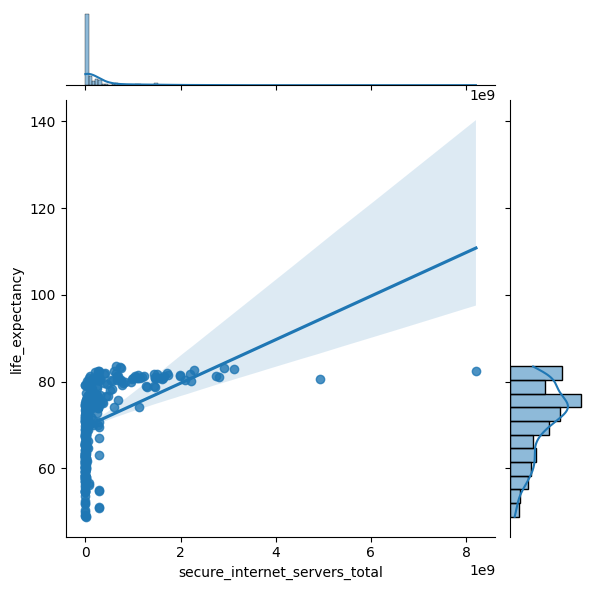

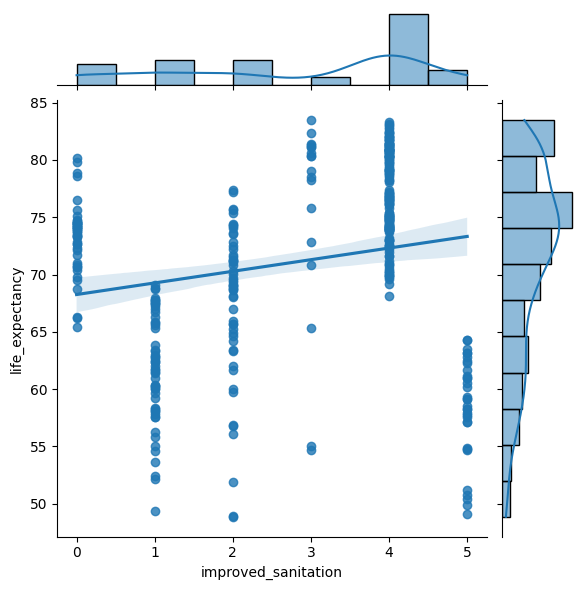

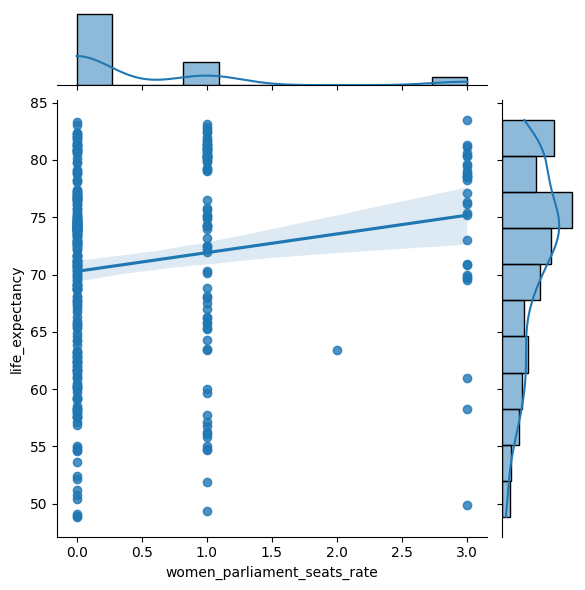

In [ ]:
# Joint plots
import seaborn as sns
import matplotlib.pyplot as plt

# List of attributes to plot joint plots with 'life_expectancy'
attributes = ['surface_area', 'agricultural_land', 'forest_area', 'armed_forces_total',
              'urban_pop_major_cities', 'urban_pop_minor_cities', 'national_income',
              'inflation_annual',
              'mobile_subscriptions','internet_users','secure_internet_servers_total',
              'improved_sanitation', 'women_parliament_seats_rate']

for attribute in attributes:
    sns.jointplot(x=attribute, y='life_expectancy', data=data_copy, kind='reg')
    plt.show()



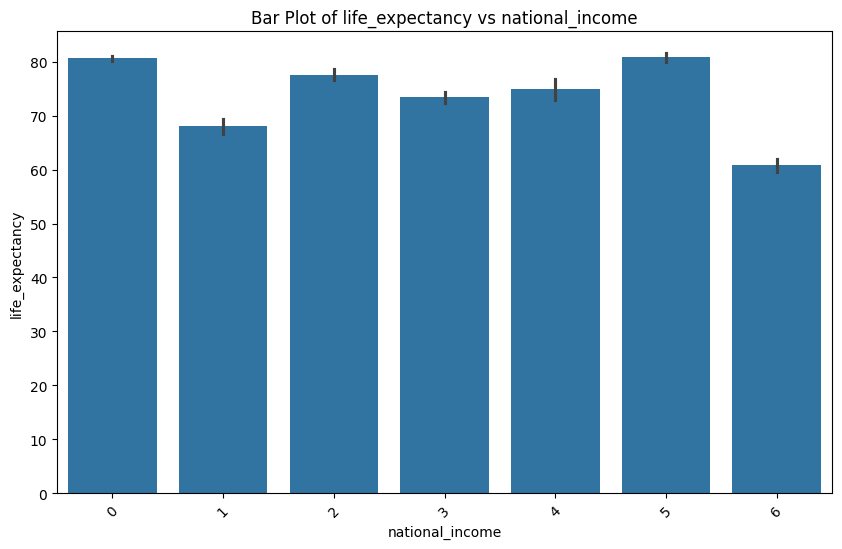

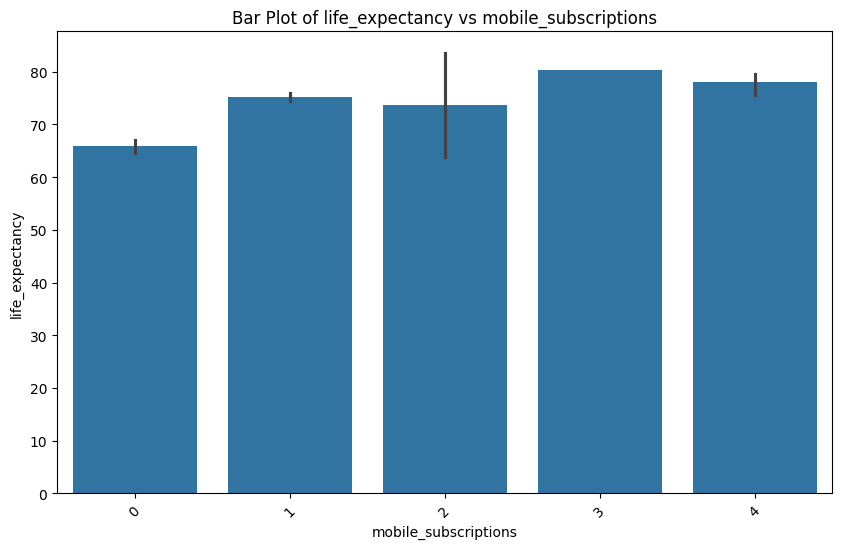

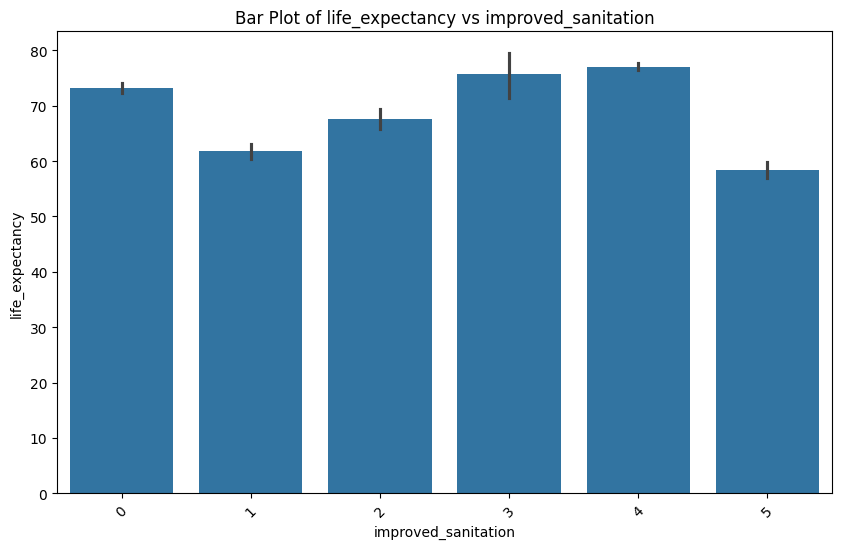

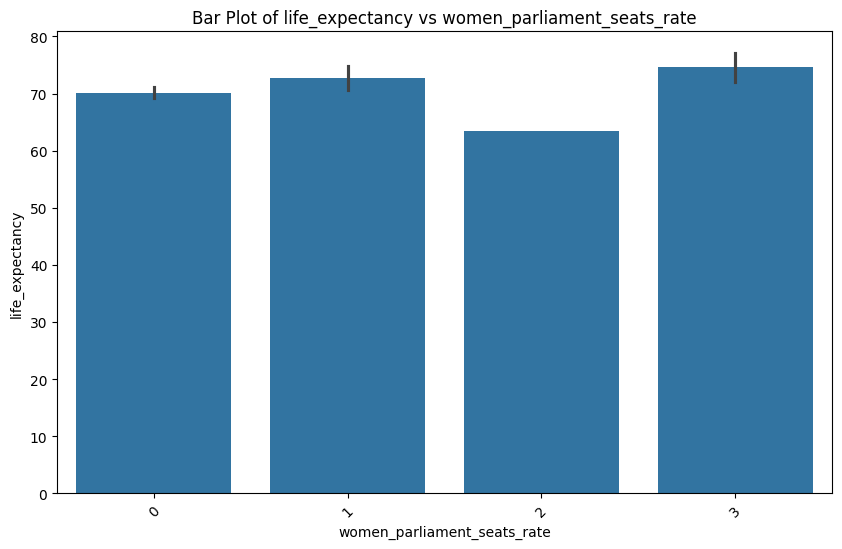

In [31]:
# Bar plots for 'life_expectancy'
import seaborn as sns
import matplotlib.pyplot as plt

#making bar plots for categorical data only
attributes = [ 'national_income',
              'mobile_subscriptions',
              'improved_sanitation', 'women_parliament_seats_rate']

for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=attribute, y='life_expectancy', data=data_copy)
    plt.title(f'Bar Plot of life_expectancy vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('life_expectancy')
    plt.xticks(rotation=45)
    plt.show()


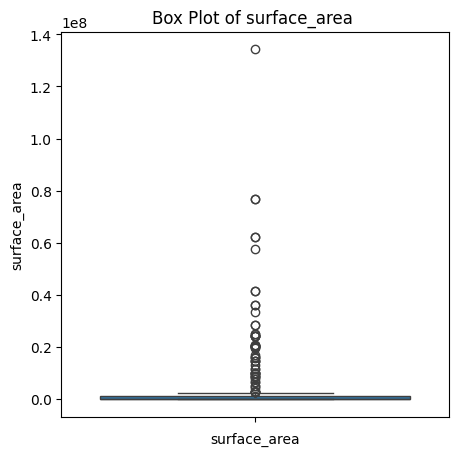

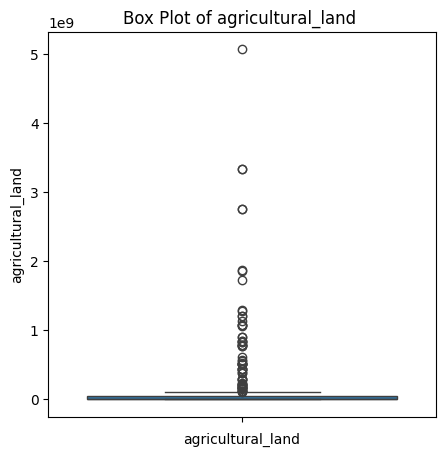

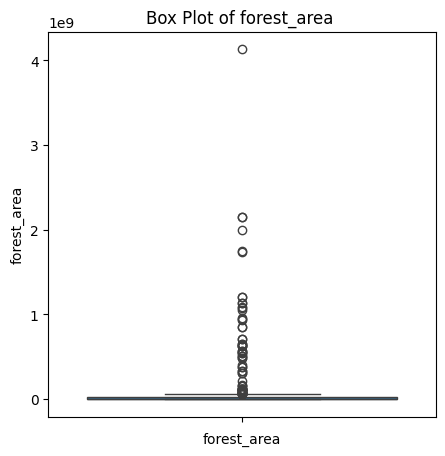

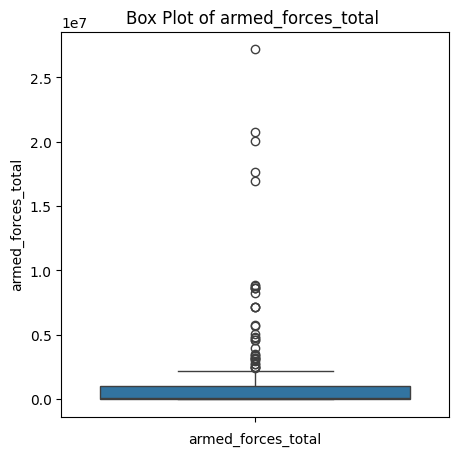

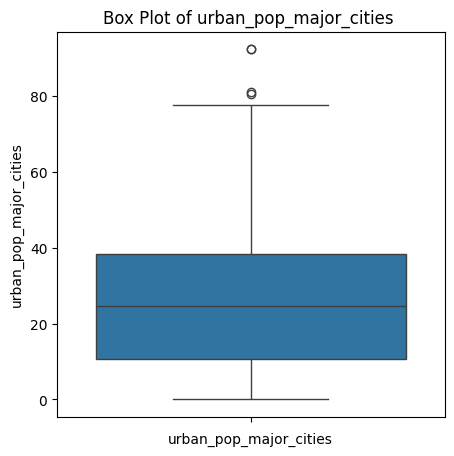

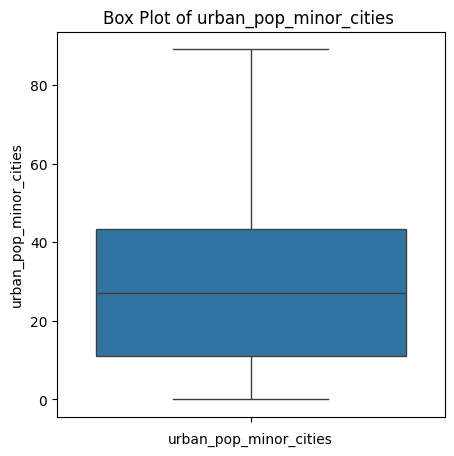

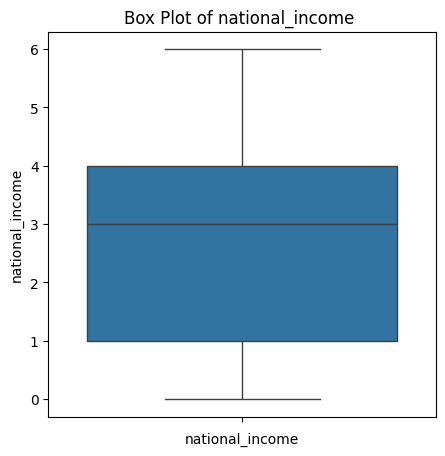

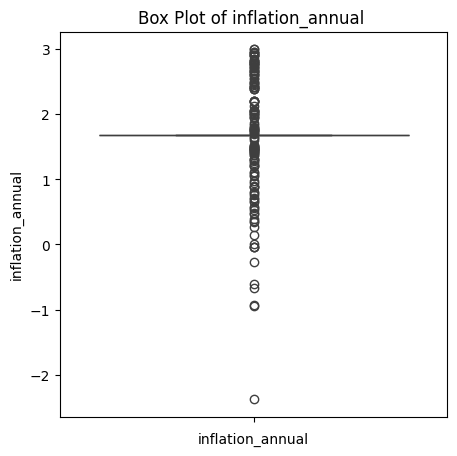

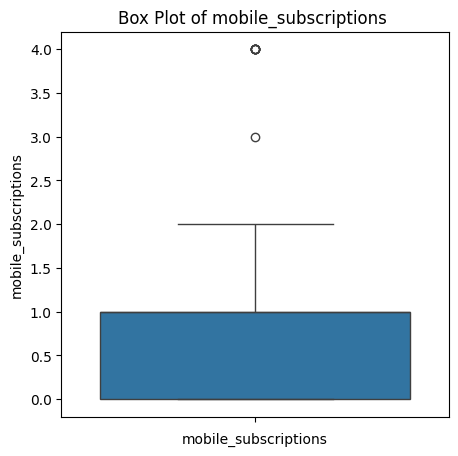

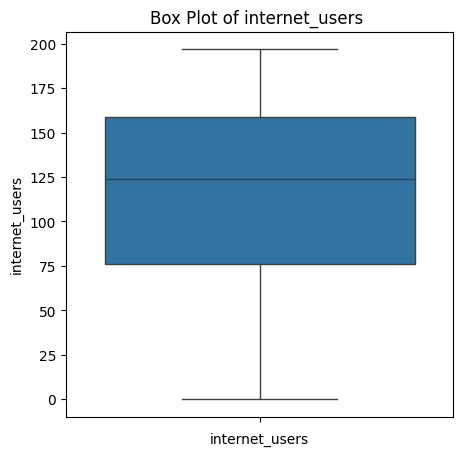

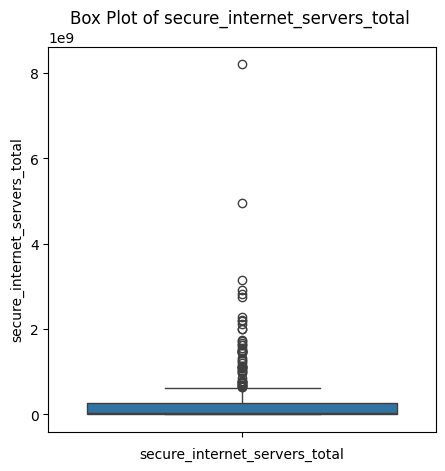

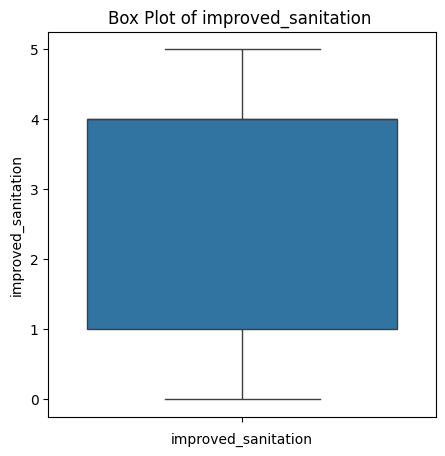

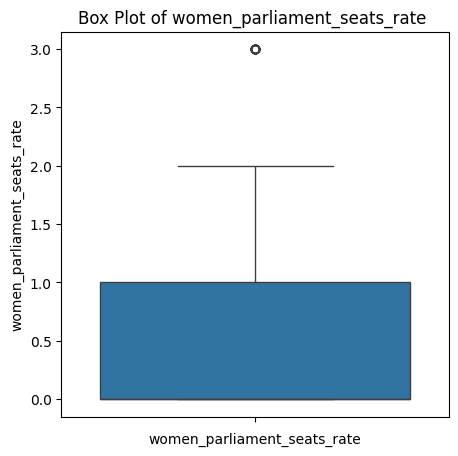

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of attributes to plot box plots
attributes = ['surface_area', 'agricultural_land', 'forest_area', 'armed_forces_total',
              'urban_pop_major_cities', 'urban_pop_minor_cities', 'national_income',
              'inflation_annual',
              'mobile_subscriptions','internet_users','secure_internet_servers_total',
              'improved_sanitation', 'women_parliament_seats_rate']
for attribute in attributes:
    plt.figure(figsize=(5, 5))  # Adjust figure size to accommodate vertical plots
    sns.boxplot(y=attribute, data=data_copy)
    plt.title(f'Box Plot of {attribute} ')
    plt.xlabel(attribute)
    plt.ylabel(attribute)
    plt.show()


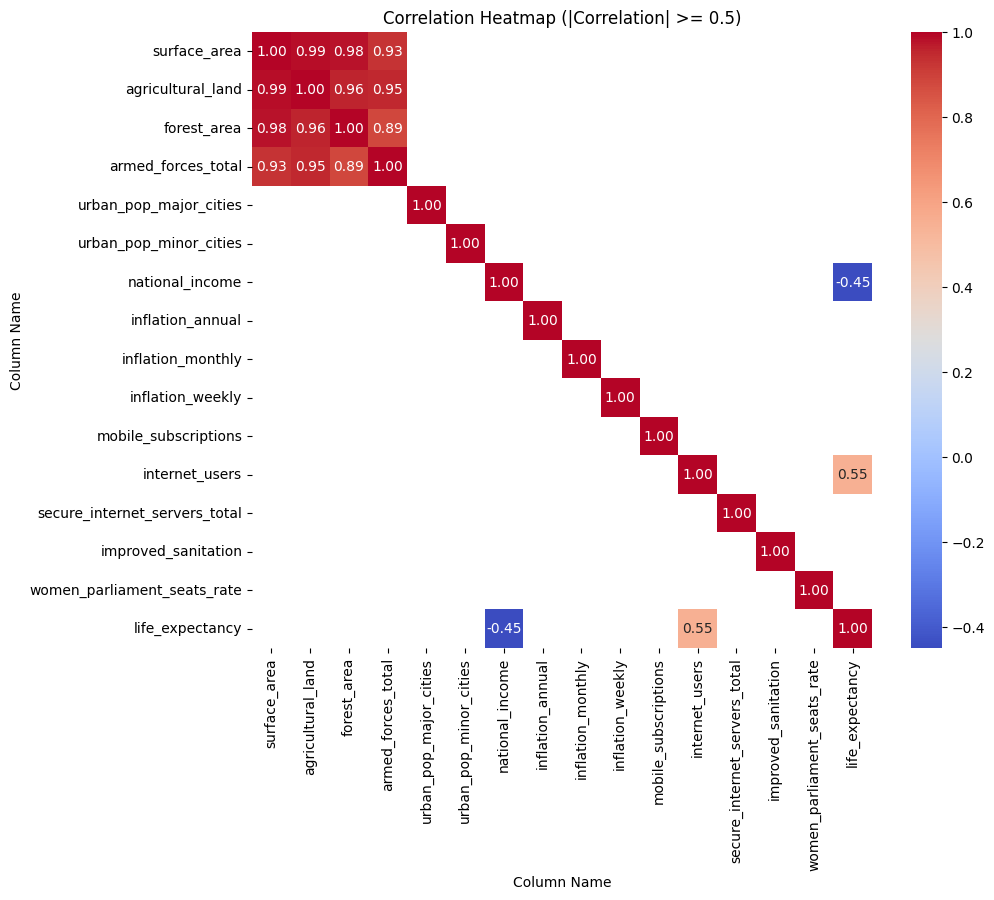

In [37]:
# Correlation heatmap where correlation value is greater than or equal to +0.5 and less than or equal to -0.4
import seaborn as sns
import matplotlib.pyplot as plt

data_for_correlation = data_copy
correlation_matrix = data_for_correlation.corr(numeric_only=True)
filtered_correlation_matrix = correlation_matrix[((correlation_matrix >= 0.5) | (correlation_matrix <= -0.4))]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (|Correlation| >= 0.5)')
plt.show()



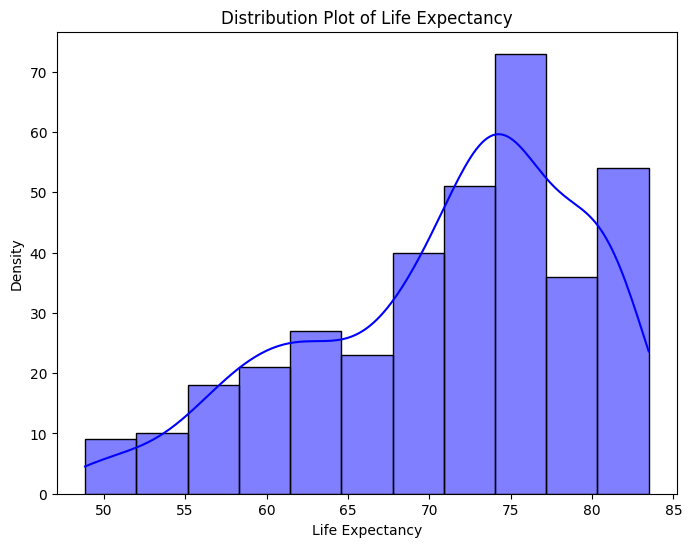

In [38]:
# distribution plot of target variable (life expectancy)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(data_copy['life_expectancy'], kde=True, color='blue')
plt.title('Distribution Plot of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Density')
plt.show()



## Feature Selection

After performing a thorough analysis, we can select useful features required and train the model using those features. Sometimes, we can simply pass all the features and then determine important features from the trained classifier by evaluating the weights assigned by the classifier to each features. We'll get to that later on.

In [43]:
# Fetures agricultural_land and forest_area are highly correlated with surface_area.
selected_features = data_copy.drop(columns=['agricultural_land', 'forest_area', 'inflation_monthly', 'inflation_weekly'])
print("Dimensions after feature selection:", selected_features.shape)



Dimensions after feature selection: (362, 12)


## Model Training

This is a Regression problem since we are predicting life expetancy which is a continous random variable. The steps involved are as follows:

1. Standardize or Normalize Training Data
2. Train Test Split
3. Train Model
4. Evaluate Important Features

**Note: It's a good practice to train multiple models (2 or 3 at least) and then choose the best performing model.**

In [59]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from IPython.display import display, HTML

# Columns not to be standardized
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy', 'improved_sanitation', 'women_parliament_seats_rate']
scaler = StandardScaler()
standardized_data = selected_features.copy()

# Applying standardization to each column except those in cols
for column in standardized_data.columns:
    if column not in cols:
        # Apply standardization to the column
        standardized_data[column] = scaler.fit_transform(standardized_data[[column]])


In [60]:
# Training Test Split

from sklearn.model_selection import train_test_split
X = standardized_data.drop(columns=['life_expectancy'])
y = standardized_data['life_expectancy']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Dimensions:", X_train.shape[0], "rows,", X_train.shape[1], "columns")
print("Validation Set Dimensions:", X_test.shape[0], "rows,", X_test.shape[1], "columns")

Training Set Dimensions: 289 rows, 11 columns
Validation Set Dimensions: 73 rows, 11 columns


In [58]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
randomf=RandomForestRegressor(n_estimators=200,random_state=42)
randomf.fit(X_train,y_train)
y_predict=randomf.predict(X_test)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))


Mean Absolute Error for Training Set: 1.0161505033278513
Mean Absolute Error for Test Set: 2.6524663437814957


In [54]:
from sklearn.linear_model import LinearRegression

# Using Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set (Linear Regression):', mean_absolute_error(y_train, linear_reg.predict(X_train)))
print('Mean Absolute Error for Test Set (Linear Regression):', mean_absolute_error(y_test, linear_reg.predict(X_test)))



Mean Absolute Error for Training Set (Linear Regression): 3.691070377433652
Mean Absolute Error for Test Set (Linear Regression): 4.252371805699074


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Using Gradient Boosting Regressor model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set (Gradient Boosting Regressor):', mean_absolute_error(y_train, gradient_boosting_reg.predict(X_train)))
print('Mean Absolute Error for Test Set (Gradient Boosting Regressor):', mean_absolute_error(y_test, gradient_boosting_reg.predict(X_test)))


Mean Absolute Error for Training Set (Gradient Boosting Regressor): 1.1658826525674937
Mean Absolute Error for Test Set (Gradient Boosting Regressor): 2.8320986023441557


In [56]:
import xgboost as xgb

# Usinh XGBoost model
xgboost_reg = xgb.XGBRegressor(random_state=42)
xgboost_reg.fit(X_train, y_train)
y_pred_xgb = xgboost_reg.predict(X_test)

# Mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set (XGBoost):', mean_absolute_error(y_train, xgboost_reg.predict(X_train)))
print('Mean Absolute Error for Test Set (XGBoost):', mean_absolute_error(y_test, xgboost_reg.predict(X_test)))


Mean Absolute Error for Training Set (XGBoost): 0.0068899857980437955
Mean Absolute Error for Test Set (XGBoost): 2.65980528751204


In [50]:
# important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)


feature: surface_area = 0.0386357235123712
feature: armed_forces_total = 0.06876186502369885
feature: urban_pop_major_cities = 0.028487111821394084
feature: urban_pop_minor_cities = 0.06275613946100127
feature: national_income = 0.20113403658304968
feature: inflation_annual = 0.004285948318290604
feature: mobile_subscriptions = 0.006698188631164836
feature: internet_users = 0.11742309450331259
feature: secure_internet_servers_total = 0.4449249509225233
feature: improved_sanitation = 0.019279344597736357
feature: women_parliament_seats_rate = 0.007613596625457152


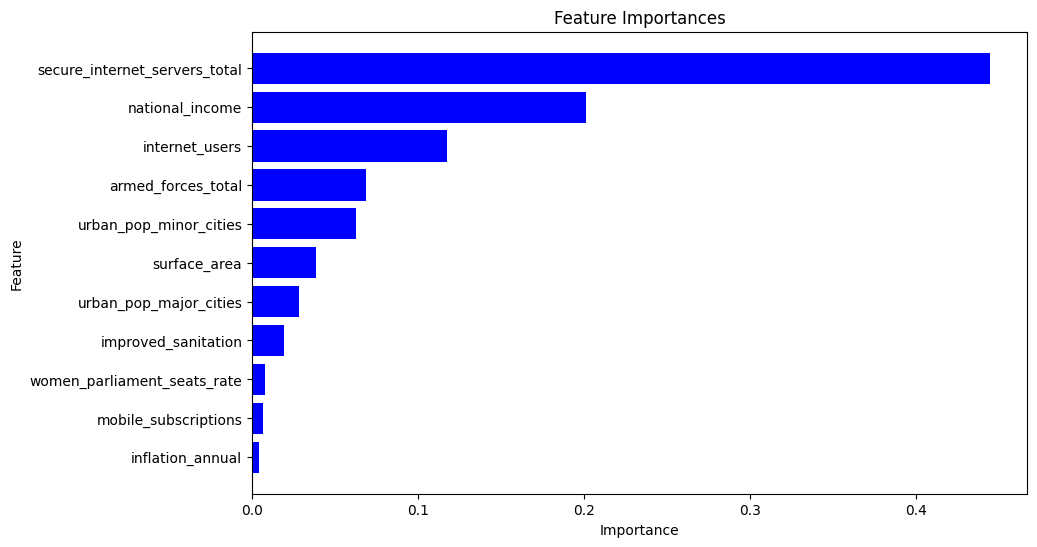

In [52]:
import matplotlib.pyplot as plt

feature_names = X.columns
importance_values = randomf.feature_importances_

sorted_indices = importance_values.argsort()
sorted_feature_names = feature_names[sorted_indices]
sorted_importance_values = importance_values[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance_values, color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
